In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# IRIS Dataset
### This data sets consists of 3 different types of irises :
 * **Setosa**
 * **Versicolour**
 * **Virginica**


## Features:
* **Sepal Length**
* **Sepal Width**
* **Petal Length**
* **Petal Width**

In [ ]:
# Load Iris Data
iris = load_iris()

In [ ]:
# Creating pd DataFrames
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])

# Scatter Plot of the Iris dataset

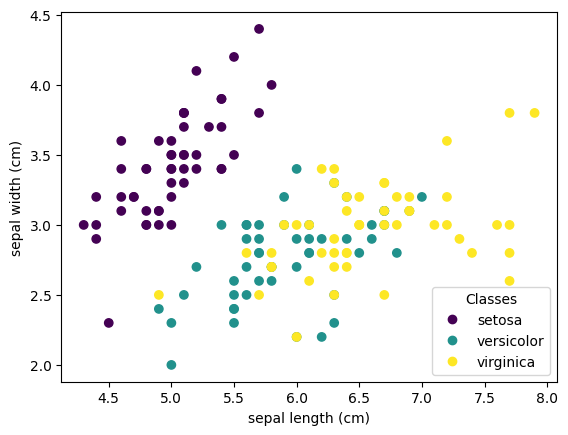

In [ ]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [ ]:
#return the firt 5 dataset row
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
target_df

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:

b = np.ones(150)
iris_df['Augmentation'] = b

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Augmentation
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.2,1.0
4,5.0,3.6,1.4,0.2,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.0
146,6.3,2.5,5.0,1.9,1.0
147,6.5,3.0,5.2,2.0,1.0
148,6.2,3.4,5.4,2.3,1.0


# Split dataset
split the data using the **train_test_split()** method from **skitlearn**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(iris_df,target_df,test_size=0.2)

**One VS All**

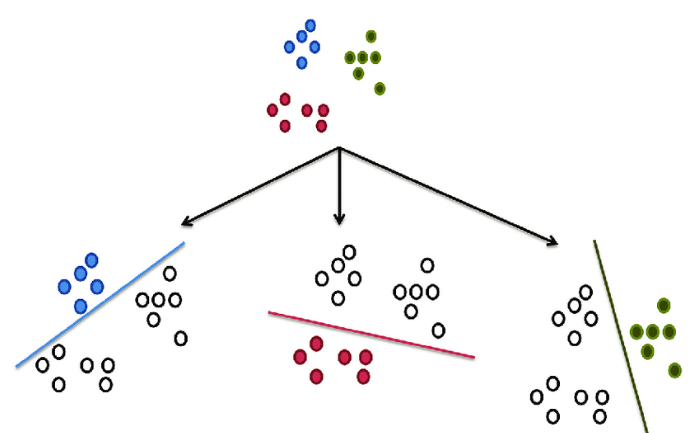

In [ ]:
y1 = np.where(y_train == 0, 1, -1)
y2 = np.where(y_train == 1, 1, -1)
y3 = np.where(y_train == 2, 1, -1)

In [ ]:
y1 = y1.reshape(len(y1))
y2 = y2.reshape(len(y2))
y3 = y3.reshape(len(y3))

In [ ]:
y1

array([ 1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,
       -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,
       -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,
        1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1,
        1])

# Calculate w
**w=(Z^T * Z)^-1 * Z^T * b**


In [ ]:
def Pseudoinverse(X):
    X_tr = X.transpose()
    X_ps = np.linalg.inv(X_tr.dot(X)).dot(X_tr)
    return X_ps

In [ ]:
w1 = Pseudoinverse(X_train).dot(y1)
w2 = Pseudoinverse(X_train).dot(y2)
w3 = Pseudoinverse(X_train).dot(y3)

In [ ]:
w1

array([ 0.02295278,  0.59083368, -0.41342111, -0.11003703, -0.60489791])

# Test Model

In [ ]:
# Equations
y1 = np.array(X_test.dot(w1))
y2 = np.array(X_test.dot(w2))
y3 = np.array(X_test.dot(w3))

In [ ]:
def test_model(X, w1, w2, w3):
    y1 = np.array(X.dot(w1))
    y2 = np.array(X.dot(w2))
    y3 = np.array(X.dot(w3))

    y = []

    for i in range(len(y1)):
        class1 = y1[i] > 0 and y2[i] < 0 and y3[i] < 0
        class2 = y1[i] < 0 and y2[i] > 0 and y3[i] < 0
        class3 = y1[i] < 0 and y2[i] < 0 and y3[i] > 0

        undefined = not(class1^class2^class3) # XNOR operation

        y_i = -1
        if(class1): y_i = 0
        if(class2): y_i = 1
        if(class3): y_i = 2
        if(undefined): y_i = -1

        y.append(y_i)

    y_arr = np.array(y)

    return y_arr

In [ ]:
test_model(X_test, w1, w2, w3)

array([-1, -1,  0,  1,  2,  0,  2,  2,  2,  2,  2, -1,  1, -1,  1, -1,  2,
       -1, -1, -1,  1, -1, -1,  0,  1,  1, -1,  2,  0, -1])

# Using Built-in function

In [ ]:
# Load Iris Data
iris = load_iris()

In [ ]:
# Creating pd DataFrames
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])

In [ ]:
from sklearn.linear_model import  LinearRegression

#over here we split the data. into the x&y trainer and y&x tester
X_train,X_test,y_train,y_test = train_test_split(iris_df,target_df,test_size=0.2)

In [ ]:
#create our linear model
lr = LinearRegression()

#fitting the model on the training data and try to predict the X_test
iris_model = lr.fit(X_train, y_train)
predictions = iris_model.predict(X_test)

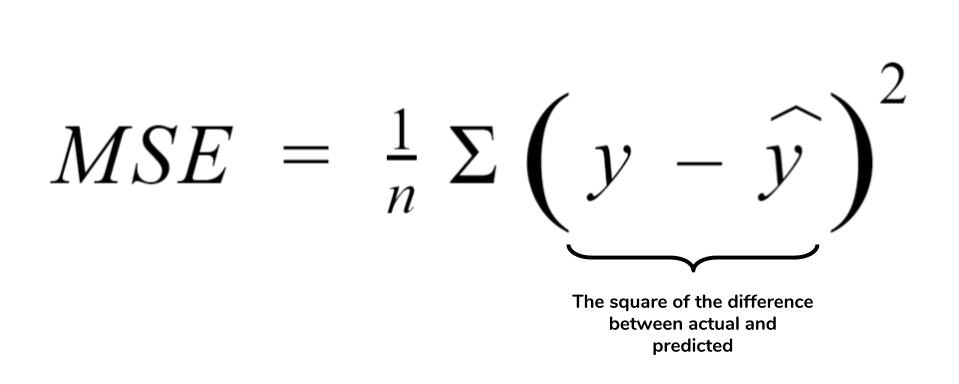

In [ ]:
from sklearn.metrics import mean_squared_error
# Mean squared error
mse = mean_squared_error(y_test, predictions)
mse

0.033609287624368614